In [2]:
import os
import torch
import torch.nn as nn
import numpy as np
import time
import random
import math
import copy
from matplotlib import pyplot as plt


0.22734012335429765
0.2415545926101752
0.24500632842689024
0.2334473002323386
0.22501100301125462
0.23221691066978462
0.2031208625254372
0.21169069523887868
coeff: [-6.93627466e-13  2.68375010e-10 -4.23050089e-08  3.47350383e-06
 -1.56612505e-04  3.68088321e-03 -3.60367467e-02  2.89500000e-01]


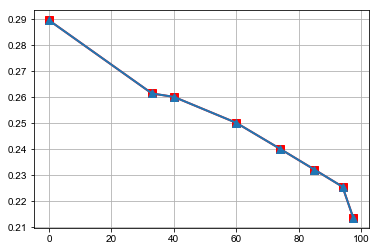

[ 3.18154885e-07 -3.86034497e-05  1.52110719e-03 -1.63438743e-02
  1.74342466e-01]


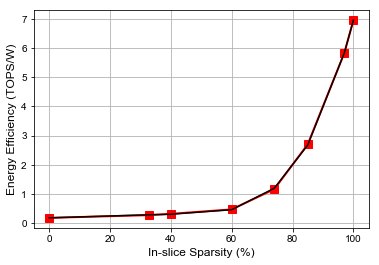

4.018703290275372
1.1102793452352795
0.685422505971768
1.9076376544311313
4.4058872382930705
3.669698659226909
6.395867688586457
6.092273506748801


In [6]:
sparsity = [0, 33, 40, 60, 74, 85, 94, 97.44]
# power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.2295] # origin
# power = [0.2895, 0.2613, 0.2530, 0.2350, 0.2254, 0.2225, 0.2208]
power = [0.2895, 0.2613, 0.2600, 0.250, 0.240, 0.232, 0.2254, 0.2134]
color = (255/255, 0, 0)
plt.plot(sparsity, power, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

plt.grid(True)

coeff = np.polyfit(sparsity, power, 7)
f = np.poly1d(coeff)
plt.plot(sparsity, f(sparsity), 'x-', marker='^',  linewidth=2, markersize=8)
from numpy import random
# np.random.seed(0)

# C3D
# sparsity_cp = [92*77, 98*96, 98*90, 98*87, 97*88, 97*83, 98*97, 98*90] # tdvd
sparsity_cp = [92*(100-(100-1.5)/10), 98*55, 98*46, 98*66, 97*88, 97*83, 98*(100-(100-97)/4), 98*(100-(100-90)/4)] # hlb
factor = 1 #0.6394/0.2254
# 3DUNET
# sparsity_cp=np.array([75,75,96,96,96,96,98,98,96,96,98,98,98,98,98,98,98,96,96,96,96,96,75,75,96,96,96,96,98,98,96,96,98,98,98,98,98,98,98,98,98,96,96,96,96,96,96,96,96,96,96,96])*np.array([84,97,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,98,99,99,99,89,91,89,85,86,90,86,95,88,80,87,72,73,65,75,71,67,55,63,55,62,53,75,71,87,73,91,86,92,91
# ])
# factor = 0.60529867/0.2134
# power_voltage = [0.02700444 0.09750533 0.21337867 0.42320533 0.60529867]
# print((90.8*97.6)**0.5, f((90.8*97.6)**0.5))
# print((96.3*98.6)**0.5, f((96.3*98.6)**0.5))

for y in sparsity_cp:
    # print((y)**0.5)
    y = f((y)**0.5)
    
    print( (y+np.random.randint(-3, 3)/1000)*factor)
print("coeff: {}".format(coeff))
plt.show()



# ######################################################################
# #  random sparsity driven EE
sparsity = [0, 33, 40, 60, 74, 85, 97, 100] # random sparsity
energy = [0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832, 6.96]
# speedup = np.array([0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832]) / 0.175
fig_name = '../../generate/sparsity_driven_EE&speedup.svg'



# power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.230]
#plt.figure(figsize=(4,4))
color = (255/255, 0, 0)
# plt.figure(figsize =(3.4,2.5), dpi = 200 )
plt.plot(sparsity, energy, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

from numpy import polyfit, poly1d
coeff = polyfit(sparsity, energy, 4)
print(coeff)
f = poly1d(coeff)
plt.plot(sparsity, f(sparsity), 'k-')

# plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('In-slice Sparsity (%)', size=12)
plt.ylabel('Energy Efficiency (TOPS/W)', size=12)
plt.grid(True)

plt.show()

# factor = 
for y in sparsity_cp:
    # print((y)**0.5)
    y = f((y)**0.5)
    
    print( (y+np.random.randint(-3, 3)/100))



[-64 -30 -20 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1
   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  20  30
  64]
[-64 -30 -20 -15 -14 -13 -12 -11 -10   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  10  11  12  13  14  15  20  30
  64]
[ 6.47284871e-16  6.91096211e-25 -3.70068670e-12 -3.87844189e-21
  4.81357213e-09  4.75284333e-18 -2.19987005e-06 -1.96557299e-15
  3.70511994e-04  3.11137241e-13 -1.37929700e-02 -8.67497300e-12
  4.43106415e-02 -1.27940026e-09]
[ 2.60633805e-21  2.76923920e-25 -1.59299278e-17 -1.59865394e-21
  2.53889537e-14  2.14297727e-18 -1.72272383e-11 -1.02970679e-15
  5.94955355e-09  1.75419688e-13 -1.11394022e-06  3.31816998e-12
  1.11638701e-04 -4.03288439e-09 -5.44573403e-03  3.94475443e-07
  1.08940116e-01 -9.79045995e-06 -5.85916308e-01  1.00351028e-03]


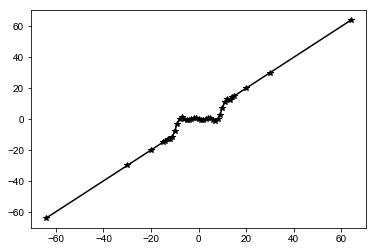

In [45]:
import numpy as np
from matplotlib import pyplot as plt
th =10
x = np.array([-64, -30, -20, -15, -14, -13, -12, -11, -10, -9, -8, -7,-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 64])
y = np.where(np.abs(x)<th, 0, x)
print(x)
print(y)
from numpy import polyfit, poly1d
coeff = polyfit(x, y, 13)
print(coeff)
coeff = polyfit(x, y, 19)
print(coeff)
f = poly1d(coeff)

plt.plot(x, f(x), 'k*-')


In [ ]:
ultilization = [0.508, 0.381, 0.35, 0.26, 0.202, 0.168, 0.0074]
plt.plot(sparsity, ultilization, 'x-', marker='*', color='green',  linewidth=2, markersize=8, label='energy efficiency')
fetch_sparsity = 100- 9.2
fetch_energy = np.interp(fetch_sparsity, sparsity, ultilization)
print(fetch_energy)
plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('Sparsity (%)', size=12)
plt.ylabel('Ultilization ', size=12)
plt.grid(True)
plt.show()

In [1]:
# -*- coding: utf-8 -*- 
import  xdrlib ,sys
import xlrd
def open_excel(file= '../source/paper_JSSC.xls'):
    try:
        data = xlrd.open_workbook(file)
        return data
    except: # Exception,e:
        print("read error ")
        
def excel_table_byindex(file= 'file.xls',colnameindex=0,by_index=0, nrows = 1):
    data = open_excel(file)
    table = data.sheets()[by_index]
#     nrows = table.nrows #ÐÐÊý
    ncols = table.ncols #ÁÐÊý
    colnames =  table.row_values(colnameindex) #Ä³Ò»ÐÐÊý¾Ý 
    list =[]
    for rownum in range(1,nrows):

         row = table.row_values(rownum)
         if row:
             app = {}
             for i in range(len(colnames)):
                app[colnames[i]] = row[i] 
             list.append(app)
    return list

voltage =[]
frequency =[]
power =[]
tables = excel_table_byindex(file='/workspace/Sagitta_Fig/source/Paper_JSSC.xls',by_index=4, nrows =19)
for row in tables:
   print(row)
   voltage.append(row['Voltage-Frequency Scaling'])
   frequency.append(row['Clock Frequency(MHz)'])
   power.append(row['Power(mW)'])



{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 5.0, 'Power(mW)': 0.009}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 10.0, 'Power(mW)': 0.0163}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 20.0, 'Power(mW)': 0.03}
{'Voltage-Frequency Scaling': 0.71, 'Clock Frequency(MHz)': 30.0, 'Power(mW)': 0.045}
{'Voltage-Frequency Scaling': 0.72, 'Clock Frequency(MHz)': 40.0, 'Power(mW)': 0.06}
{'Voltage-Frequency Scaling': 0.74, 'Clock Frequency(MHz)': 50.0, 'Power(mW)': 0.0788}
{'Voltage-Frequency Scaling': 0.77, 'Clock Frequency(MHz)': 60.0, 'Power(mW)': 0.1011}
{'Voltage-Frequency Scaling': 0.81, 'Clock Frequency(MHz)': 70.0, 'Power(mW)': 0.1294}
{'Voltage-Frequency Scaling': 0.85, 'Clock Frequency(MHz)': 80.0, 'Power(mW)': 0.1616}
{'Voltage-Frequency Scaling': 0.88, 'Clock Frequency(MHz)': 90.0, 'Power(mW)': 0.192}
{'Voltage-Frequency Scaling': 0.9, 'Clock Frequency(MHz)': 100.0, 'Power(mW)': 0.2254}
{'Voltage-Frequency Scaling': 0.95, 'Clock Frequenc

In [2]:

cls_plt_fig('').func_plt_fig({   "x_name":"Voltage", 
            "x_value": voltage, 
            "x_label" : r"$\bf{Voltage}$"+' ' + r"$\bf{(V)}$",
            "y1_fig_type": "plot",
            "y1_name":["Frequency"],
            "y1_value":[frequency], 
            "y1_color":[(0, 0, 0),],
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Frequency}$"+' ' + r"$\bf{(MHz)}$",
            "y1_marker":['s'],
            "y1_legend": [r"$\bf{Frequency}$"],
            "y1_yticks_max": 180,
            "y2_fig_type": "plot",
            "y2_name":"Power",
            "y2_value":power,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Power}$"+' ' + r"$\bf{(W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Power}$",
            "y2_yticks_max": 0.9,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "legend_loc": (0.01, 0.8),
            "grid_axis": 'x',
            "bar_width": 0.01,
            # "xticks": False,
            "figsize" : (7, 4.6),
            "fig_name" :'../../generate/Voltage-Frequency-Scaling.svg'
})

NameError: name 'cls_plt_fig' is not defined

[0.0004     0.00035556 0.00099556 0.0016     0.0032     0.00490311
 0.00359467 0.00575111 0.00502756 0.00768    0.01202133 0.01319022
 0.01695778 0.02181111 0.01159467 0.02424889 0.02859733 0.03410133]
[0.71 0.77 0.9  1.08 1.2 ] [ 20  60 100 140 170] [0.028  0.1011 0.2254 0.4348 0.6394] [6.10714286 5.07418398 3.79325643 2.75298988 2.2732249 ]
[0.71 0.77 0.9  1.08 1.2 ] [ 20  60 100 140 170] [0.02700444 0.09750533 0.21337867 0.42320533 0.60529867] [7.16548716 5.95352049 4.53419273 3.20057403 2.71725363]
0 0 [0.71 0.77 0.9  1.08 1.2 ]
1 0 [0.71 0.77 0.9  1.08 1.2 ]
[0.71 0.77 0.9  1.08 1.2 ] [0.7 0.8 0.9 1.  1.1 1.2 1.3]


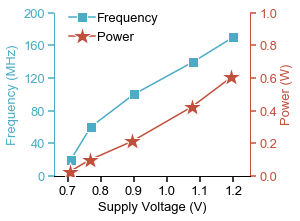

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from cls_plt_fig import cls_plt_fig

import random

voltage = np.array([0.71, 0.71,0.71, 0.72, 0.72, 0.74, 0.77, 0.81, 0.85,
0.88, 0.9, 0.95, 0.99, 1.04, 1.08, 1.12, 1.17, 1.2
])
frequency = np.array([5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
])
power = np.array([0.009,0.016,0.028,0.045,0.060,0.0788,0.1011,0.1294,0.1616,0.192,0.2254,0.2698,0.2935,0.3775,0.4348,0.496,0.5362,0.6394
])

frequency_c3d = np.array(frequency)
power_c3d = np.array(power)
energy_efficiency_c3d = (3.8 * 0.225 / 100) * frequency_c3d / power_c3d

frequency_3dunet = np.array(frequency)

np.random.seed(0)
power_diff = np.random.randint(5, 15, size=18)/1000 #random.randint(5, 15)/1000
print(power_diff*(power/0.225))

power_3dunet = np.array(power) - power_diff*(np.array(power)/0.225)
energy_efficiency_3dunet = (4.5 * 0.215 / 100) * frequency_3dunet / power_3dunet


y1_legend = ["Frequency"]
y1_value = [frequency]
y1_label = "Frequency (MHz)"
y1_marker = ['s']
y2_value = power
y2_label = "Power (W)"
y2_legend = ["Power"]
y3_label = "Eenergy Efficiency (TOPS/W)"


pick = [2, 6, 10, 14, 17]
voltage = voltage.take(pick)
frequency_c3d = frequency_c3d.take(pick)
frequency_3dunet = frequency_3dunet.take(pick)
power_c3d = power_c3d.take(pick)
power_3dunet = power_3dunet.take(pick)
energy_efficiency_c3d= energy_efficiency_c3d.take(pick)
energy_efficiency_3dunet = energy_efficiency_3dunet.take(pick)

print(voltage, frequency_c3d, power_c3d, energy_efficiency_c3d)
print(voltage, frequency_3dunet, power_3dunet, energy_efficiency_3dunet)

cls_plt_fig('').func_plt_fig(
    fig_name='../../generate/Voltage-Frequency-power-Scaling_3dunet.svg',
    x_label = "Supply Voltage (V)",
    x_value=np.array(voltage),
    y_label = [y1_label,y2_label],
    y_value = [[frequency_3dunet],[power_3dunet]],
    y_fig_type = [['plot', 'plot'], ['plot', 'plot']],
    y_legend = [y1_legend, y2_legend],
    y_color = [[(75/255, 172/255, 198/255), (75/255, 172/255, 198/255)],[(192/255, 80/255, 60/255), (192/255, 80/255, 60/255)]],
    # y_edgecolor = [['black', 'black'],['black', 'black'], ['black', 'black']],
    y_yticks_max=[200, 1, 10],
    y_yticks_min=[0, 0, 0],
    len_yticks=5,
    xticks= np.around(np.linspace(0.7, 1.3, 7), 1),
    y_axis_color= [(75/255, 172/255, 198/255), (192/255, 80/255, 60/255)],
    legend_loc =(0.05, 0.78),
    figsize=(3.5, 3) #[0, 0, 1, 1],
)

# y3_legend = ["C3D", "3D U-Net"]
# cls_plt_fig('').func_plt_fig(
#     fig_name='../../generate/Voltage-EE-Scaling.svg',
#     x_label = "Supply Voltage (V)",
#     x_value=np.arange(0, 5)/2,
#     y_label = [y3_label],
#     y_value = [[energy_efficiency_c3d, energy_efficiency_3dunet]],
#     y_fig_type = [['bar', 'bar']],
#     y_legend = [y3_legend],
#     y_color = [[(129/255,  186/255,  226/255), (226/255, 129/255, 128/255)]],
#     # y_edgecolor = [['black', 'black']],
#     y_yticks_max=[8, 1, 10],
#     y_yticks_min=[0, 0, 0],
#     len_yticks=8,
#     xticks= ['0.71', '0.77', '0.90', '1.08', '1.20'],
#     legend_loc ="upper center",
#     legend_ncol=2,
#     bar_width = 0.1,
#     bar_gap_width = 0.02
# )


In [ ]:
# ÔØÈëÄ£¿é
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
# import seaborn as sns
from scipy import interpolate

#Éú³ÉÊý¾Ý
# x = np.linspace(0.1,0.9,4)
x = np.array([1, 2, 3, 4])
# y = np.linspace(0.1,0.9,4)
y = np.array([88, 89, 96.5, 98])
# z = np.random.rand(16)
accuracy = np.array([0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948, 0.935, 0.908,
0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948     
    ])
# z = np.zeros(16)
# for i in range(16):
#     z[i] = 0.961 - accuracy[i]
z = 0.961 - accuracy
print(z)
#²åÖµ
# xx, yy = np.meshgrid(x, y)

f = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.linspace(1,4,5)
ynew = np.linspace(88,98,5)
znew = f(xnew, ynew)

#ÐÞ¸Äx,y£¬zÊäÈë»­Í¼º¯ÊýÇ°µÄshape
xx1, yy1 = np.meshgrid(xnew, ynew)
newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = xx1.reshape(newshape)
x_input = yy1.reshape(newshape)
z_input = znew.reshape(newshape)

#»­Í¼
# sns.set(style='white')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes(MyAxes3D(ax, 'l'))
ax.plot_trisurf(x_input,y_input,z_input,cmap=cm.coolwarm)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.savefig('../../generate/threshold-sparsity-accuracy.svg', format='svg')
plt.show()


In [ ]:
# c3d
# con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
energy_efficiency = np.array([0.353, 5.9, 5.3, 5.1, 4.8, 4.9, 1.38, 1.154])
speedup = [
3.359523941,
28.36806079,
25.33799735,
21.52732095,
21.10512515,
18.52442435,
5.098949274,
3.908653758
]
power = np.array([0.2213, 0.2212 ,0.2210 ,0.2209 ,0.2208 ,0.2208 ,0.2210 ,0.2208 ])
bar_width = 0.4
y2_yticks_max = 12
y1_yticks_max = 30
legend_loc = (0.65, 0.8)
fig_name = '../../generate/speedup&EE_layer_of_C3D.svg'

# 3dunet
# con_layer = [
# 'Conv1',
# 'Conv2',
# 'Conv3',
# 'Conv4',
# 'Conv5',
# 'Conv6',
# 'Conv7',
# 'Conv8',
# 'Conv9',
# 'Conv10',
# 'Conv11',
# 'Conv12',
# 'Conv13',
# 'Conv14',
# 'Conv15',
# 'Conv16',
# 'Conv17',
# 'Conv18',
# 'Conv19',
# 'Conv20',
# 'Conv21',
# 'Conv22',
# 'Conv23',
# 'Conv24',
# 'Conv25',
# 'Conv26',
# 'Conv27',
# 'Conv28',
# 'Conv29',
# 'Conv30'

# ]
# energy_efficiency = np.array([
# 0.233286122,
# 4.435876361,
# 6.03772006,
# 6.371646318,
# 5.980497309,
# 6.240827834,
# 6.450648274,
# 6.371646318,
# 6.202671446,
# 6.166550284,
# 6.480048242,
# 6.371646318,
# 6.281370301,
# 6.281370301,
# 6.422937532,
# 1.57566893,
# 1.546093755,
# 1.592911579,
# 1.524844811,
# 1.516984233,
# 1.440326527,
# 5.926945078,
# 6.067936931,
# 5.876495005,
# 6.281370301,
# 5.876495005,
# 6.422937532,
# 5.337780384,
# 6.545353822,
# 6.422937532

# ])
# power = np.array([
# 0.2231, 
# 0.2208, 
# 0.2213, 
# 0.2215, 
# 0.2213, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2214, 
# 0.2216, 
# 0.2215, 
# 0.2214, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2215, 
# 0.2213, 
# 0.2213, 
# 0.2212, 
# 0.2212, 
# 0.2213, 
# 0.2212, 
# 0.2214, 
# 0.2212, 
# 0.2215, 
# 0.2210, 
# 0.2216, 
# 0.2215 

#  ])
# 3dunet
# con_layer = [
# 'Layer1',
# 'Layer2',
# 'Layer3',
# 'Layer4',
# 'Layer5',
# 'Layer6',
# 'Layer7',
# 'Layer8',
# 'Layer9',
# 'Layer10'
# ]

# energy_efficiency = np.array([
# 5.4,
# 6.2,
# 6.2,
# 5.1,
# 1.5,
# 3.6,
# 6,
# 6.3,
# 5.9,
# 6.5

# ])
# power = np.array([
# 0.2231, 
# 0.2208, 
# 0.2213, 
# 0.2215, 
# 0.2213, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2214
#  ])


# bar_width = 0.4
# xticks_fontsize = 8
# y2_yticks_max = 12
# y1_yticks_max = 30
# legend_loc = (0.25, 0.81)
# fig_name = '../../generate/speedup&EE_layer_of_3DUent.svg'


speedup = energy_efficiency*power/(0.175*0.2895)
y1_color = (128/255, 216/255, 248/255)
y2_color = (255/255, 177/255, 177/255)

y1_axis_color = (0/255, 153/255, 255/255)
y2_axis_color = (230/255, 57/255, 26/255)
# for x in range(len(technique)):
#     plt.text(x-0.15,energy_efficiency[x]+0.5,'%s' %round(energy_efficiency[x],2),va='center')
sys.path.append("../")
# import plt_fig
cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": np.arange(len(con_layer)), 
            "x_label" : r"$\bf{Conv}$"+' ' +r"$\bf{Layers}$",
            "y1_fig_type": "bar",
            "y1_name":"speedup",
            "y1_value":speedup, 
            "y1_color":y1_color,
            "y1_axis_color":y1_axis_color,
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Speedup}$",
            "y1_marker":'s',
            "y1_legend": r"$\bf{Speedup}$",
            "y1_yticks_max":y1_yticks_max,
            "y2_fig_type": "bar",
            "y2_name":"energy_efficiency",
            "y2_value":energy_efficiency,
            "y2_color":y2_color,
            "y2_axis_color":y2_axis_color,
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$"+' ' + r"$\bf{(TOPS/W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$",
            "y2_yticks_max": y2_yticks_max,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": bar_width,
            "xticks": con_layer,
            'xticks_fontsize': xticks_fontsize,
            # "plt_text": False,
            "legend_loc": legend_loc,
            "fig_name" :fig_name
})

[0.17513135 1.40869565 1.71132075 3.82222222]
[0.17513135 2.38409091 2.82987552 4.53488372]
[ 1.          9.77164151 21.82488889] [ 1.         16.15858921 25.89418605]
['Baseline', 'FFZS+HLB', 'FFZS+HLB\n+TDVD']
[0 1 2] ['Baseline', 'FFZS+HLB', 'FFZS+HLB\n+TDVD']


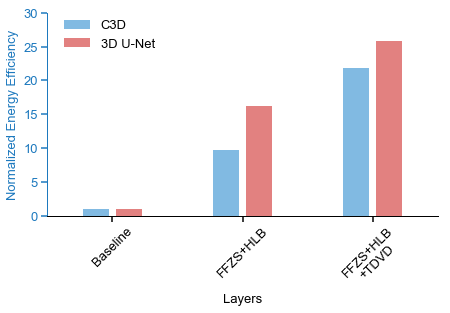

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from cls_plt_fig import cls_plt_fig

# #####################################################################
# # Comparison with Technique
# # x_label = "Technique"



# # # # # c3d
# # # # # speedup = np.array([0.22, 1 ,3.2, 4.61])/0.22 
# # # # # energy_efficiency = np.array([0.175, 1 ,3.2, 4.21])

speedup_c3d = np.array([1, 6.48, 9.07,  17.2]) # 1 x6.48x 1.4x 1.9  = 17.2
power_factor = np.array([5.71, 4.6, 5.3, 4.5 ])
print(speedup_c3d / power_factor)
energy_efficiency_c3d = speedup_c3d / power_factor
energy_efficiency_c3d = np.delete(energy_efficiency_c3d, 1)/energy_efficiency_c3d[0] # np.array([0.175   3.59])

# # 3dunet
speedup_3dunet = np.array([1, 10.49, 13.64,  19.5]) # 1 x10.49x 1.3x 1.43  = 19.5
power_factor = np.array([5.71, 4.4, 4.82, 4.3 ])
print(speedup_3dunet / power_factor)
energy_efficiency_3dunet = speedup_3dunet / power_factor
energy_efficiency_3dunet = np.delete(speedup_3dunet / power_factor, 1)/energy_efficiency_3dunet[0] #0.175,..., 4.65
print(energy_efficiency_c3d, energy_efficiency_3dunet)
# # fig_name ='../../generate/technique_speedup.svg'
# # technique = ['Baseline', 'FFZS', 'FFZS\n+HLB', 'FFZS+HLB\n+TDVD']
# # x_value = np.arange(len(technique))
# # xticks = technique
# # y1_value = [speedup_c3d, speedup_3dunet]
# # y1_yticks_max = 25
# # len_yticks = 5
# # y1_label = "Speedup"
# # bar_width = 0.25

fig_name ='../../generate/technique_energy-efficiency.svg'
technique = ['Baseline', 'FFZS+HLB', 'FFZS+HLB\n+TDVD']
x_value = np.arange(len(technique))
xticks = technique
y1_value = [energy_efficiency_c3d, energy_efficiency_3dunet]
y1_yticks_max = 30
len_yticks = 6
y1_label = "Normalized Energy Efficiency"
bar_width = 0.2

figsize = (4, 3)
y1_legend = ['C3D', '3D U-Net']
legend_ncol = 1
legend_loc = (0.03, 0.79)

y_value = [y1_value]
y_fig_type = [['bar', 'bar']]
y_label = [y1_label]
y_color = [[(129/255,  186/255,  226/255),(226/255, 129/255, 128/255)]]
y_legend = [y1_legend]
y_yticks_max = [y1_yticks_max]
# #####################################################################
# # # Comparsion with SOTA
# y1_yticks_max = 15
# y2_yticks_max = 15
# fig_name ='../../generate/SOTA.svg'


# # # # 2DCNN
# technique = ['Eyeriss [18] \n (AlexNet) ', '[12]\n(Mobilenet-27)', ' STICKER [11]\n (AlexNet)', 'This Work\n (C3D)', 'This Work\n (3D U-Net)']
# speedup = np.array([1, 0.9, 8.1, 12.2*17.2/9.89, 12.2*19.5/9.89])
# energy_efficiency = np.array([1,  1, 8.6, 13.3*3.8/4.66, 13.3*4.5/4.66])

# # C3D
# # technique = ['FC3D', 'FPGA2018', 'DAC2020', 'This Work']
# # energy_efficiency = np.array([0.0013,  0.03, 0.0118, 3.59])
# # power = np.array([9.7, 260, 6.7, 0.23])
# # speedup = energy_efficiency#*power/(0.0013*9.7)

# x_value = np.arange(len(technique))
# x_label = "${Technique}$"

# bar_width = 0.2
# xticks = technique
# legend_loc = (0.01, 0.8)
# len_yticks = 5
# y2_label = "Normalized Energy Efficiency"
# y2_legend = "Normalized Energy Efficiency"
# y1_legend = ['Speedup']
# y1_value = [speedup]
# y2_value = [energy_efficiency]
# y2_legend = ['Normalized Energy Efficiency']
# y1_label = "Speedup"

# y_value = [y2_value]
# y_label = [y2_label]
# y_fig_type = [['bar'], ['bar']]
# y_legend = [y1_legend, y2_legend]
# legend_ncol = 2
# legend_loc = (0.03, 0.79)
# y_color=[[(226/255, 129/255, 128/255)], [(129/255,  186/255,  226/255)]]
# y_yticks_max = [y2_yticks_max]
# #####################################################################
# # Sparsity-driven EE & Speedup
# sparsity = np.linspace(0, 100, 11)
# energy_efficiency = np.array([\
# 0.533 ,
# 0.584 ,
# 0.876 ,
# 1.168 ,
# 1.576 ,
# 2.219 ,
# 3.503 ,
# 5.255 ,
# 8.408 ,
# 16.582 ,
# 17.166 
# ])
# power_factor = f(sparsity)
# energy_efficiency = energy_efficiency / power_factor*0.2208/2.93
# print(energy_efficiency)
# # plt.plot(sparsity, f(sparsity), 'x-', marker='^',  linewidth=2, markersize=8)

# # speedup = np.array([0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832]) / 0.175
# speedup = sparsity/100
# fig_name = '../../generate/sparsity_driven_EE&speedup.svg'
# x_value = sparsity
# x_label = "${Inslice}$"# + ' ' + "$\bf{Sparsity}$"
# figsize = (7, 4.6)
# xticks = ['0', '33', '40', '60', '74', '85', '97']
# y2_yticks_max = 7
# bar_width = 4


# legend_loc = (0.01, 0.8)
########################################################################################
# Each layer's speedup and EE

# len_yticks = 5
# #########################
# # c3d
# # con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
# con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
# energy_efficiency = np.array([0.353, 5.9, 5.3, 5.1, 4.8, 4.9, 1.38, 1.154])
# # speedup = [
# # 3.359523941,
# # 28.36806079,
# # 25.33799735,
# # 21.52732095,
# # 21.10512515,
# # 18.52442435,
# # 5.098949274,
# # 3.908653758
# # ]
# power = np.array([0.2213, 0.2212 ,0.2210 ,0.2209 ,0.2208 ,0.2208 ,0.2210 ,0.2208 ])
# bar_width = 0.2
# y2_yticks_max = 10
# y1_yticks_max = 30
# # legend_loc = (0.65, 0.8)
# fig_name = '../../generate/speedup&EE_layer_of_C3D.svg'

#########################
# 3dunet

# con_layer = [
# 'Layer1',
# 'Layer2',
# 'Layer3',
# 'Layer4',
# 'Layer5',
# 'Layer6',
# 'Layer7',
# 'Layer8',
# 'Layer9',
# 'Layer10'
# ]

# energy_efficiency = np.array([
# 5.4,
# 5.9,
# 6.2,
# 5.1,
# 1.5,
# 3.6,
# 6,
# 6.3,
# 5.9,
# 6.5

# ])
# power = np.array([
# 0.2231, 
# 0.2208, 
# 0.2213, 
# 0.2215, 
# 0.2213, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2214
#  ])


# bar_width = 0.2
# y2_yticks_max = 12
# y1_yticks_max = 30
# fig_name = '../../generate/speedup&EE_layer_of_3DUent.svg'
# len_yticks = 6

# x_label = "Layers"
# x_value = np.arange(len(con_layer))
# speedup = energy_efficiency*power/(0.175*0.2895)

# y1_legend = ['Speedup']
# y1_value = [speedup]
# y2_value = [energy_efficiency]
# y2_legend = ['Energy Efficiency']
# y1_label = "Speedup"
# xticks = con_layer
# y2_label = "Energy Efficiency (TOPS/W)"
# y_value = [y1_value, y2_value]
# y_label = [y1_label, y2_label]
# y_fig_type = [['bar'], ['bar']]
# y_legend = [y1_legend, y2_legend]
# legend_ncol = 2
# legend_loc = (0.2, 0.92)
# y_color=[[(97/255, 169/255, 218/255)], [(226/255, 129/255, 128/255)]]
# y_yticks_max = [y1_yticks_max, y2_yticks_max]
###################################################################################

print(xticks)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_label = x_label,
    x_value=x_value,
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    # y_color = [[(0/255,173/255,186/255), (1, 189/255, 63/255)]],
    y_color = y_color, #[[(129/255,  186/255,  226/255), (226/255, 129/255, 128/255)]],
    # y_edgecolor = [['black', 'black']],
    y_axis_color = [(29/255, 121/255, 190/255), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max, # [y1_yticks_max, y2_yticks_max]
    y_yticks_min=[0, 0, 0],
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    legend_ncol=legend_ncol,
    bar_width = bar_width,
    bar_gap_width = 0.05
)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import statistics
import datetime   
import sys
sys.path.append('../')

speedup_c3d = np.array([1, 6.48, 9.07,  17.2]) # 1 x6.48x 1.4x 1.9  = 17.2
power_factor = np.array([5.71, 4.6, 5.3, 4.5 ])
energy_efficiency_c3d = np.delete(speedup_c3d / power_factor, 1) # np.array([0.175   3.59])

# fig_name ='../../generate/technique_c3d.svg'

# # 3dunet
speedup_3dunet = np.array([1, 10.49, 13.64,  19.5]) # 1 x10.49x 1.3x 1.43  = 19.5
power_factor = np.array([5.71, 4.4, 4.82, 4.3 ])
energy_efficiency_3dunet = np.delete(speedup_3dunet / power_factor, 1) #0.175,..., 4.65

# energy_efficiency[1] = 0
fig_name ='../../generate/technique_c3d.svg'

y1_value_multi = [np.pad(speedup_c3d,(0,3),'constant',constant_values=(0,0)), np.pad(speedup_3dunet,(0,3),'constant',constant_values=(0,0))]
y2_value_multi = [np.pad(energy_efficiency_c3d[0:3],(4,0),'constant',constant_values=(0,0)), np.pad(energy_efficiency_3dunet[0:3],(4,0),'constant',constant_values=(0,0))]
# x1_value = 
y1_legend_multi = ['C3D', '3D U-Net']
y2_legend_multi = ['C3D', '3D U-Net']
# y2_legend_multi = ['Energy-Efficiency', 'Energy-Efficiency']
xlabel = r"$\bf{Technique}$"
y1_label = r"$\bf{Speedup}$"
y2_label = r"$\bf{Energy\ Efficiency\ (TOPS/W)}$"
# fig_name = os.path.join('../generate', 'tdvd.csv')
y1_yticks_max = 30
y1_yticks_min = 0
y2_yticks_max = 6
y2_yticks_min = 0
len_yticks = 7
print(y1_value_multi)
print(y2_value_multi)
xticks = ['Baseline', 'FFZS', 'FFZS\n+HLB', 'FFZS\n+HLB\n+TDVD',
'Baseline', 'FFZS\n+HLB', 'FFZS\n+HLB\n+TDVD']
x_value = [1, 2, 3, 4, 5, 6, 7]
figsize = [7, 4.6]
legend_loc = [0.4, 0.9]
from cls_plt_fig import cls_plt_fig
cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": np.array(x_value), 
            "x_label" : xlabel,
            "y1_fig_type": "bar",
            "y1_name":y1_legend_multi,
            "y1_value":y1_value_multi, 
            "y1_color":[(56/255,194/255,93/255), (96/255,157/255,202/255)],
            "y1_linestyle":'x-',
            "y1_label":y1_label,
            # "y1_marker":y_marker_multi,
            "y1_markerfacecolor":"white",
            "y1_markeredgewidth": 1,
            "y1_legend": y1_legend_multi,
            "y1_yticks_max":y1_yticks_max,
            "y1_yticks_min":y1_yticks_min,
            "y1_axis_color": (0,0,0),
            "y1_edgecolor": [(1,1,1), (1,1,1)],
            # "y1_hatch": ['///','/'],
            "y1_facecolor": [(56/255,194/255,93/255), (96/255,157/255,202/255)],

            "y2_fig_type": 'bar',
            "y2_name":y2_legend_multi,
            "y2_value":y2_value_multi, 
            "y2_color":[(96/255,157/255,202/255), (96/255,157/255,202/255)],
            "y2_linestyle":'x-',
            "y2_label":y2_label,
            # "y2_marker":y_marker_multi,
            "y2_markerfacecolor":"white",
            "y2_markeredgewidth": 1,
            "y2_legend": y2_legend_multi,
            "y2_legend_off": True,
            "y2_yticks_max":y2_yticks_max,
            "y2_yticks_min":y2_yticks_min,
            "y2_axis_color": (0,0,0),
            "y2_edgecolor": [(1,1,1), (1,1,1)],
            # "y2_hatch": ['///','/'],
            "y2_facecolor": [(56/255,194/255,93/255), (96/255,157/255,202/255)],


            "len_yticks": len_yticks,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.4,
            "bar_gap_width": 0.1,
            "xticks": xticks,
            'xticks_fontsize': 12,
            # "plt_text": False,
            "legend_loc": legend_loc,
            "legend_size": 12,
            "legend_ncol": 2,
            "plt_text": False,
            'figsize':figsize,
            "fig_name" :fig_name
})

[array([ 1.  ,  6.48,  9.07, 17.2 ,  0.  ,  0.  ,  0.  ]), array([ 1.  , 10.49, 13.64, 19.5 ,  0.  ,  0.  ,  0.  ])]
[array([0.        , 0.        , 0.        , 0.        , 0.17513135,
       1.71132075, 3.82222222]), array([0.        , 0.        , 0.        , 0.        , 0.17513135,
       2.82987552, 4.53488372])]
[0 1 2] None


ValueError: fname must be a PathLike or file handle

[ 3.18154885e-07 -3.86034497e-05  1.52110719e-03 -1.63438743e-02
  1.74342466e-01]
2.1618373428282585


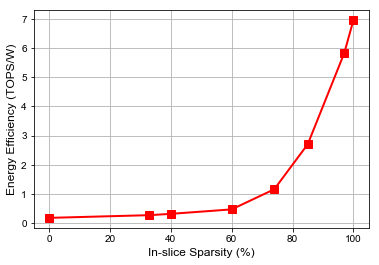

In [49]:
sparsity = [0, 33, 40, 60, 74, 85, 97, 100] # random sparsity
energy = [0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832, 6.96]
speedup = np.array([0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832]) / 0.175
fig_name = '../../generate/sparsity_driven_EE&speedup.svg'



# power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.230]
#plt.figure(figsize=(4,4))
color = (255/255, 0, 0)
# plt.figure(figsize =(3.4,2.5), dpi = 200 )
plt.plot(sparsity, energy, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

from numpy import polyfit, poly1d
coeff = polyfit(sparsity, energy, 4)
print(coeff)
f = poly1d(coeff)
# plt.plot(sparsity, f(sparsity), 'k-')
print(f(82))
# plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('In-slice Sparsity (%)', size=12)
plt.ylabel('Energy Efficiency (TOPS/W)', size=12)
plt.grid(True)

plt.show()

range(0, 21, 2)
[(0.0, 0.6, 1.0), (0.38823529411764707, 1.0, 0.39215686274509803), (1.0, 0.39215686274509803, 0.39215686274509803)]
0 0 [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
0 1 [ 0.6  2.6  4.6  6.6  8.6 10.6 12.6 14.6 16.6 18.6 20.6]
0 2 [ 1.2  3.2  5.2  7.2  9.2 11.2 13.2 15.2 17.2 19.2 21.2]
[ 0  2  4  6  8 10 12 14 16 18 20] [ 0  2  4  6  8 10 12 14 16 18 20]


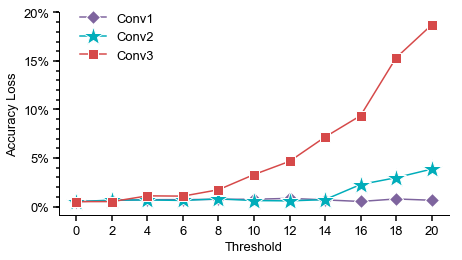

In [2]:
import numpy as np

threshold = range(0, 21, 2)
accuracy_loss= 0.970-np.array([
[0.9649305,
0.9637301,
0.9628994,
0.9628505,
0.9625254,
0.9624787,
0.9615566,
0.9631267,
0.9647457,
0.9621558,
0.9634964],

[0.9649305,
0.9633116,
0.9632202,
0.9636855,
0.9621069,
0.9638215,
0.9641466,
0.9628505,
0.9473045,
0.9402662,
0.9314263], # 

[0.9649305,
0.9648838,
0.9589603,
0.9592429,
0.9526735,
0.9370360,
0.9234340,
0.8984014,
0.8763880,
0.8168425,
0.7829756]
])
from matplotlib import colors
cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  0.5, 0.5),
                   (1.0,  1, 1.0)),

         'green': ((0.0,  0, 0.0),
                   (0.5,  1, 1),
                   (1.0,  0, 0.0)),

         'blue':  ((0.0,  1, 1),
                   (0.5,  0.5, 0.5),
                   (1.0,  0, 0))}
cmap = colors.LinearSegmentedColormap('custom', cdict)
y1_legend = ['Conv1', 'Conv2', 'Conv3']
# y1_marker = ['s', '^', 'o', 'p','*', 'D', '+', '4']
y1_marker = ['s', 'o', '^']
# y1_color=[]
# for i in range(8):
#     y1_color.append( cmap(0.5*i) )
y1_color = [(0/255, 153/255, 255/255), (99/255, 255/255, 100/255), (255/255, 100/255, 100/255)]
y1_yticks_max = 0.1
fig_name = '../../generate/sensitivity.svg'
print(threshold)
print(y1_color)



# cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
#             "x_value": threshold, 
#             "x_label" : r"$\bf{Threshold}$",
#             "y1_fig_type": "plot",
#             "y1_name":y1_legend,
#             "y1_value":accuracy_loss, 
#             "y1_color":y1_color,
#             "y1_linestyle":'x-',
#             "y1_label":r"$\bf{Accuracy}$" + ' '+ r"$\bf{Loss}$",
#             "y1_marker":y1_marker,
#             "y1_markerfacecolor": "white",
#             "y1_markeredgewidth": 2,
#             "y1_legend": y1_legend,
#             "y1_yticks_max":y1_yticks_max,
#             "y1_axis_color": (0, 0, 0),
#             "linewidth": 2,
#             "markersize": 8,
#             "family":"Arial",
#             "label_size": 10,
#             "bar_width": 0.4,
#             "xticks": threshold,
#             'xticks_fontsize': 10,
#             # "plt_text": False,
#             "legend_loc": (0.03, 0.65),
#             'figsize':(7, 3),
#             "fig_name" :fig_name,
#             'y1_yticks_max': 0.2
# })

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from cls_plt_fig import cls_plt_fig
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_label = "Threshold",
    x_value=np.array(threshold),
    y_label = ["Accuracy Loss"],
    y_value = [accuracy_loss],
    y_fig_type = [['plot', 'plot', 'plot']],
    y_legend = [y1_legend],
    y_marker=[['D', '*', 's']],
    # y_color = [[(75/255, 172/255, 198/255), (126/255, 100/255, 158/255), (192/255, 80/255, 60/255)]],
    y_color = [[(126/255, 100/255, 158/255),(0/255,173/255,186/255), (214/255, 73/255, 73/255)]],
    y_yticks_max=[0.2],
    y_yticks_min=[0],
    len_yticks=4,
    PercentFormatter=True,
    xticks= np.around(threshold, 0),
    # y_axis_color= [(75/255, 172/255, 198/255), (192/255, 80/255, 60/255),(126/255, 100/255, 158/255)],
    legend_loc =(0.04, 0.73)
    # figsize=(7, 3.5) #[0, 0, 1, 1],s
    # font_size = 18
    # legend_ncol=3
)

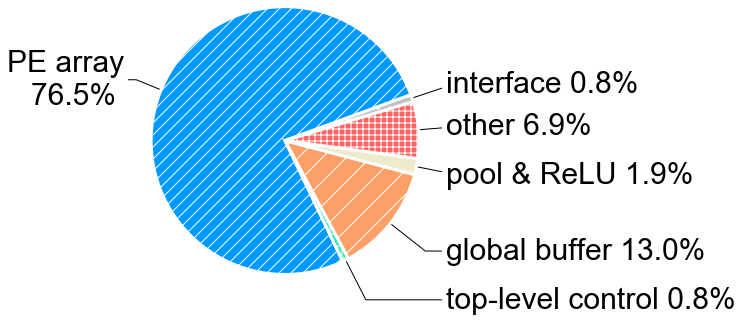

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# top-level
fig_name = 'top'
startangle = 20
area = np.array([12885986,129255, 2196810,
327901,
1154988,
141859
])

labels = ['PE array\n{:.1f}% '.format(area[0]/sum(area)*100), 'top-level control {:.1f}%'.format(area[1]/sum(area)*100), 'global buffer {:.1f}%'.format(area[2]/sum(area)*100), 'pool & ReLU {:.1f}%'.format(area[3]/sum(area)*100), 'other {:.1f}%'.format(area[4]/sum(area)*100), 'interface {:.1f}%'.format(area[5]/sum(area)*100)]
# colors = [(128/255, 216/255, 248/255), (99/255, 224/255, 196/255), (253/255, 160/255, 103/255), (238/255, 234/255, 204/255), (255/255, 177/255, 177/255), (191/255, 191/255, 191/255)]

# intra-PE
# fig_name = 'intra-PE'
# startangle= 20
# area = np.array([
# 139604,
# 131362,
# 234684,
# 16977,
# 165240,
# 97781
# ])

# labels = ['activation buffer   \n{:.1f}   % '.format(area[0]/sum(area)*100), 'weight buffer {:.1f}%'.format(area[2]/sum(area)*100), 'psum buffer {:.1f}%'.format(area[1]/sum(area)*100), 'scheduler {:.1f}%'.format(area[3]/sum(area)*100), 'MAC {:.1f}%'.format(area[5]/sum(area)*100), 'PE control {:.1f}%'.format(area[4]/sum(area)*100)]


colors = [(0/255, 153/255, 255/255), (67/255, 230/255, 184/255), (253/255, 160/255, 103/255), (238/255, 234/255, 204/255), (255/255, 100/255, 100/255), (191/255, 191/255, 191/255)]

# colors = [(0/255, 153/255, 255/255), (215/255, 227/255, 191/255), (255/255, 242/255, 204/255), (183/255, 221/255, 232/255), (238/255, 234/255, 242/255), (191/255, 191/255, 191/255)]



# plt.rcParams["font.family"] = ["Arial"]
plt.subplots(figsize=(4, 4.6))
data = {"PE": 120, "电子": 90, "计算机": 50, "经管": 60, "建筑": 100, "汽车": 50}
# 构造数据
data = pd.DataFrame([data])
# 绘制圆环图，并返回饼块对象
wedges, texts = plt.pie(area, colors=colors, startangle=startangle, radius=1.5, wedgeprops={'linewidth': 3, 'edgecolor': "white"})
# 构造annotate函数的**kwargs参数，设置引导线线型
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
# 遍历饼块绘制注释标签和引导线
for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    # print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    # 演示引导线起点位置
    # plt.plot(x, y, "or")
    # 根据x的值即角度所在象限确定引导线的对齐方式
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 绘制注释标签和引导线
    if i >0:
        plt.annotate(
            labels[i],
            xy=(x, y),
            xytext=(1.8 * np.sign(x), 2 * y),
            horizontalalignment=horizontalalignment,fontsize=30,
            **kw
        )
    else:
        plt.annotate(
            labels[i],
            xy=(x, y),
            xytext=(1.8* np.sign(x), 1.8* y),
            # xytext=(2* x, 4* y),
            horizontalalignment=horizontalalignment,fontsize=30,
            **kw
        )
# plt.title("专业人数占比")
wedges[0].set_hatch('//')
wedges[1].set_hatch('+')
wedges[2].set_hatch('/')
wedges[4].set_hatch('++')
wedges[5].set_hatch('.')
plt.savefig('../../generate/area_'+fig_name+'.svg', format='svg')
plt.show()


40.0 290.244779586792 165.122389793396 2.8819293706562394 -0.966476486758285 0.25675513732613503
290.244779586792 293.18513948470354 291.71495953574777 5.091386521220827 0.3699893348213212 -0.929036001519035
293.18513948470354 353.1436850503087 323.1644122675061 5.640283019340336 0.8003591491163375 -0.5995208356894464
353.1436850503087 360.7495044544339 356.9465947523713 6.229893332210793 0.9985803187450033 -0.05326675337513596
360.7495044544339 396.50849778205156 378.62900111824274 6.608322713050628 0.9476068425671023 0.3194389956157625
396.50849778205156 399.99999430030584 398.2542460411787 6.950847853466161 0.7852710492821819 0.6191521454047146


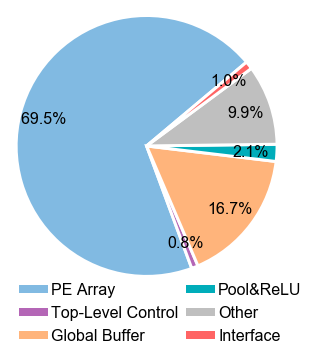

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fontsize = 16
radius = 1.2
loc_legend = (0.0,-0.25)
# top-level
legend = ['PE Array', 'Top-Level Control', 'Global Buffer', 'Pool&ReLU', 'Other', 'Interface']
fig_name = 'top'
startangle = 40
area = np.array([8653325,101676, 2073333, 263005, 1236526, 120734])

labels = ['{:.1f}% '.format(area[0]/sum(area)*100), '{:.1f}%'.format(area[1]/sum(area)*100), '{:.1f}%'.format(area[2]/sum(area)*100), '{:.1f}%'.format(area[3]/sum(area)*100), '{:.1f}%'.format(area[4]/sum(area)*100), '{:.1f}%'.format(area[5]/sum(area)*100)]
colors = [(129/255, 186/255, 226/255), (180/255,102/255, 182/255), (255/255, 180/255, 123/255), (0/255,173/255,186/255), (191/255, 191/255, 191/255),(255/255, 100/255, 100/255)]
# colors = [(0/255,173/255,186/255), (180/255,102/255, 182/255), (253/255, 160/255, 103/255), (0,128/255, 204/255), (191/255, 191/255, 191/255),(255/255, 100/255, 100/255)]

# intra-PE
# legend = ['Activation Buffer', 'Weight Buffer', 'Psum Buffer', 'Scheduler', 'MAC', 'PE Control']
# fig_name = 'intra-PE'
# startangle= 0
# area = np.array([
# 85473,
# 98156,
# 85959,
# 14083,
# 125145,
# 125481
# ])

# labels = ['{:.1f}% '.format(area[0]/sum(area)*100), '{:.1f}%'.format(area[2]/sum(area)*100), '{:.1f}%'.format(area[1]/sum(area)*100), '{:.1f}%'.format(area[3]/sum(area)*100), '{:.1f}%'.format(area[5]/sum(area)*100), '{:.1f}%'.format(area[4]/sum(area)*100)]


# colors = [(255/255, 180/255, 123/255), (179/255, 161/255, 198/255),(129/255,  186/255,  226/255), (0/255,173/255,186/255), (191/255, 191/255, 191/255),(226/255, 129/255, 128/255)]


# plt.rcParams["font.family"] = ["Arial"]
plt.subplots(figsize=(5, 5))
data = {"PE": 120, "电子": 90, "计算机": 50, "经管": 60, "建筑": 100, "汽车": 50}
# 构造数据
data = pd.DataFrame([data])
# 绘制圆环图，并返回饼块对象
wedges, texts = plt.pie(area, colors=colors, startangle=startangle, radius=radius, wedgeprops={'linewidth': 3, 'edgecolor': "white"})
# 构造annotate函数的**kwargs参数，设置引导线线型
# kw = dict(arrowprops=dict(arrowstyle="-"), zorder=10, va="center")
kw = dict(zorder=10, va="center", ha="center")
# wedges[0].set_hatch('//')
# wedges[1].set_hatch('+')
# wedges[2].set_hatch('/')
# wedges[4].set_hatch('++')
# wedges[5].set_hatch('.')
# 遍历饼块绘制注释标签和引导线
for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    # 演示引导线起点位置
    # plt.plot(radius*x, radius*y, "ob", markersize = 1)
    # 根据x的值即角度所在象限确定引导线的对齐方式
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    # kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 绘制注释标签和引导线

    # if i >0:
    plt.annotate(
        labels[i],
        xy=(radius*x*0.8, radius*y*0.8),
        xytext=(radius*x*0.8, radius*y*0.8),#(radius* np.sign(x)*1.2, y),
        # horizontalalignment=horizontalalignment,
        **kw,
        fontsize=fontsize
        # **kw
    )
    # else:
    #     plt.annotate(
    #         labels[i],
    #         xy=(x, y),
    #         xytext=(1.8* np.sign(x), 1.5* y),
    #         # xytext=(2* x, 4* y),
    #         horizontalalignment=horizontalalignment,fontsize=fontsize,
    #         **kw
    #     )

# plt.title("专业人数占比")


plt.legend(wedges, legend, loc=loc_legend, ncol=2, fontsize=fontsize, frameon=False, handletextpad=0.1,columnspacing=0.4 )
plt.savefig('../../generate/area_'+fig_name+'.svg', format='svg')
plt.show()


0 0 [0.  0.5 2.  4.  8. ]
1 0 [0.  0.5 2.  4.  8. ]
[0.  0.5 2.  4.  8. ] [0, 2, 4, 6, 8]


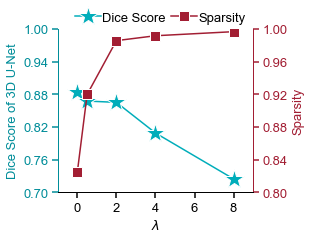

In [8]:



# C3D
# axis_y = [0.967114, 0.967, 0.964492, 0.960856, 0.949976]
# sparsity = [0.64, 0.89, 0.90, 0.96, 0.97]
# lable_2 = 'Accuracy'
# label_data = ["(0, 0, 0, 0, 0, 0, 0, 0)",
#               "(3, 3, 3, 3, 3, 3, 3, 3)",
#               "(7, 2, 3, 2, 3, 3, 4, 4)",
#               "(10, 7, 5, 5, 5, 5, 5, 2)",
#               "(17, 9, 5, 5, 6, 6, 6, 5)"
#             ]
# y1_legend = ['Accuracy']
# y1_label = r"$\bf{Accuracy}$"
# y1_value = np.array([[0.9745, 0.967, 0.964492, 0.960856, 0.949976]]) # score
# y2_value = np.array([0.545, 0.58, 0.90, 0.9, 0.97]) # sparsity
# y1_yticks_min = 0.9
# legend_loc = (0.05, 0.85)
# fig_name = '../../generate/lambda_c3d.svg'

# 3D Unet
# y1_legend = ['Score']
# y1_label = r"$\bf{Score}$"
# y1_value = np.array([[0.8836, 0.8678476, 0.8654427, 0.8090884, 0.7245791]]) # score
# y2_value = np.array([0.82, 0.92, 0.986, 0.992, 0.997]) # sparsity
# y1_yticks_min = 0.5
# legend_loc = (0.6, 0.7)
# fig_name = '../../generate/lambda_3dunet.svg'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from cls_plt_fig import cls_plt_fig


x_label = r"${\lambda}$"
x_value = np.array([0, 0.5, 2, 4, 8]) #, 10, 10.5, 12, 14, 18]) # lambda
# x_ticks = np.array([0, 0.5, 2, 4, 8, 0, 0.5, 2, 4, 8])
# y1_label = "Accuracy of C3D" 
# y1_value = np.array([[0.9745, 0.967, 0.964492, 0.960856, 0.949976]]) # score
# y2_value = np.array([[0.575, 0.61, 0.90, 0.9, 0.97]])

y1_label = "Dice Score of 3D U-Net"
y1_value = np.array([[ 0.8836, 0.8678476, 0.8654427, 0.8090884, 0.7245791]]) # score
y2_value = np.array([[0.825, 0.92, 0.986, 0.992, 0.997]])

y1_marker = ['*', '*']
y2_marker = ['s', 's']
y2_label = "Sparsity"

fig_name = '../../generate/lambda_3dunet.svg'

y1_yticks_min = 0.7

x_ticks = [0, 2, 4, 6, 8]

# cls_plt_fig('').func_plt_fig({   "x_name":"Lambda", 
#             "x_value": x_value, 
#             "x_label" : x_label,
#             "y1_fig_type": "plot",
#             "y1_name":y1_legend,
#             "y1_value":y1_value, 
#             "y1_color":y1_color, # 
#             "y1_linestyle":'x-',
#             "y1_label":y1_label,
#             "y1_marker":'s',
#             "y1_legend": y1_legend,
#             "y1_yticks_max": 1,
#             # "y2_fig_type": "plot",
#             # "y2_name":"Sparsity",
#             # "y2_value":y2_value,
#             # "y2_color":(1, 0, 0),
#             # "y2_linestyle":'--',
#             # "y2_label":y2_label,
#             # "y2_marker":'^',
#             # "y2_legend": 'Sparsity',
#             # "y2_yticks_max": 1,
#             "linewidth": 2,
#             "markersize": 8,
#             "family":"Arial",
#             "label_size": 10,
#             "legend_loc": (0.01, 0.8),
#             "grid_axis": 'x',
#             "bar_width": 0.01,
#             # "xticks": False,
#             "figsize" : (3.5, 4.6),
#             "fig_name" : fig_name
# })

# y1_color = [(75/255, 172/255, 198/255), (75/255, 172/255, 198/255)]
# y2_color = [(192/255, 80/255, 60/255), (192/255, 80/255, 60/255)]
y1_color = [(0/255,173/255,186/255), (0/255,173/255,186/255)]
y2_color = [(162/255, 30/255, 51/255), (162/255, 30/255, 51/255)]
y1_axis_color = y1_color[0]#(75/255, 172/255, 198/255)
y2_axis_color = y2_color[0]#(192/255, 80/255, 60/255)

cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_label = x_label,
    x_value=np.array(x_value),
    y_label = [y1_label, y2_label],
    y_value = [y1_value, y2_value],
    y_fig_type = [['plot'], ['plot']],
    y_legend = [['Dice Score'], ['Sparsity']],
    y_marker=[['*', '*'], ['s', 's']],
    # y_color = [[(75/255, 172/255, 198/255), (126/255, 100/255, 158/255), (192/255, 80/255, 60/255)]],
    y_color = [y1_color, y2_color],
    y_axis_color=[(0/255, 141/255, 153/255), y2_color[0]],
    y_yticks_max=[1, 1],
    y_yticks_min=[0.7, 0.8],
    len_yticks=5,
    xticks= x_ticks,
    legend_loc=(0.06, 1.0),
    legend_ncol=2,
    figsize=(3.5, 3)

)


IndexError: list index out of range

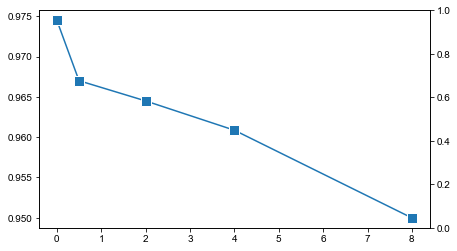

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from cls_plt_fig import cls_plt_fig


x_label = r"$\bf{\lambda}$"
x_value = np.array([0, 0.5, 2, 4, 8]) #, 10, 10.5, 12, 14, 18]) # lambda
# x_ticks = np.array([0, 0.5, 2, 4, 8, 0, 0.5, 2, 4, 8])
y_label = [r"$\bf{Accuracy/Score}$", r"$\bf{Sparsity}$"]
y_legend = [['Accuracy/Score','Accuracy/Score'], ['Sparsity','Sparsity']]
y_value = [np.array([[0.9745, 0.967, 0.964492, 0.960856, 0.949976], [ 0.8836, 0.8678476, 0.8654427, 0.8090884, 0.7245791]]), np.array([[0.545, 0.58, 0.90, 0.9, 0.97], [0.82, 0.92, 0.986, 0.992, 0.997]])] # score
# y1_marker = ['*', '*']
# y2_marker = ['s', 's']
# y2_label = 
# y2_legend = ['Sparsity','Sparsity']
# y2_value = 
# fig_name = '../../generate/lambda.svg'
# legend_loc = 'lower center'
# y1_yticks_min = 0.7

# x_axis = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
# x_ticks = [0, 2, 4, 6, 8, 0, 2, 4, 6, 8]

cls_plt_fig('').func_plt_fig(
    x_label = x_label,
    x_value=x_value,
    y_label = y_label,
    y_value = y_value,
    y_fig_type = [['plot', 'plot'], ['plot', 'plot']],
    y_legend = y_legend)





IndexError: list index out of range

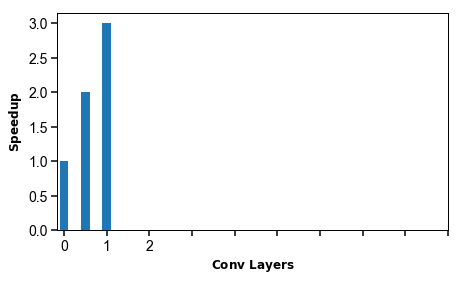

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from cls_plt_fig import cls_plt_fig
cls_plt_fig('').func_plt_fig()
